<h1><center>Le classifieur SVM</center></h1>


### Importer les bibliothéques necessaires 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### 1. Importer votre DataSet

In [2]:
df = pd.read_csv('accent-mfcc-data-1.csv')

##### Print

In [3]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


In [7]:
df.shape

(329, 13)

In [8]:
len(df)

329

In [6]:
df.columns

Index(['language', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12'],
      dtype='object')

In [8]:
df['language'].nunique()

6

In [9]:
df['language'].unique()

array(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype=object)

In [10]:
df.columns.nunique()

13

In [16]:
print(df.isnull().sum())

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64


In [23]:
df['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

#### 3. Visualiser les targets, et que remarquez vous ? 

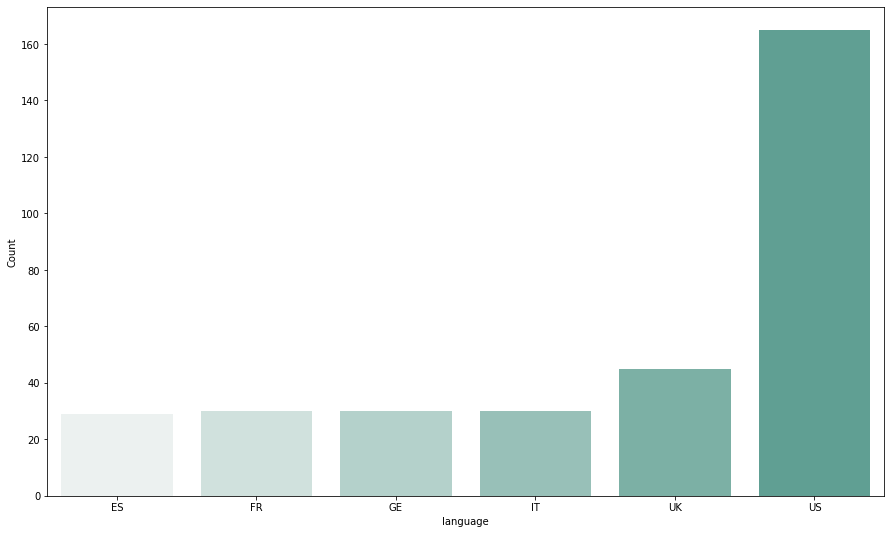

In [40]:
plt.figure(1,figsize=(15,9))
sb.countplot(x='language', data=df, palette="light:#5A9")
plt.xlabel('language')
plt.ylabel('Count')
plt.show()

#### 4. Notre variable target (Y) est 'language', Récuprer X et y à partir du jeu de données 

In [9]:
X = df.iloc[:,1:] # ou X = df.select_dtypes('number')
y = df['language'] # ou y = df.select_dtypes('object')

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (263, 12) Test: (66, 12)


#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

Former votre modèle de normalisation

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_train) 

StandardScaler()

Utiliser la classe ".mean_" et ".scale_" pour afficher la moyenne et l'écart-type, respectivement.

In [12]:
print('Mean mu', scaler.mean_)

Mean mu [ 5.59181946 -4.22632183  2.5992529   7.15234365 -5.67898168  9.78343871
 -9.37541708  5.130547   -1.2418301  -2.31279504  2.40841146 -3.98151579]


In [13]:
print('Std sigma', scaler.scale_)

Std sigma [5.12930249 3.48084986 3.56470532 4.21688631 4.56790665 3.604798
 2.40092648 2.61349981 3.53289827 4.97468711 3.47184345 2.97609042]


Appliquer la normalisation sur la base d'apprentissage et la base de test sans écraser les données brutes.

In [18]:
X_train_scaled = scaler.transform(X_train) 
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) 

X_test_scaled = scaler.transform(X_test) 
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) 

Vérifier que la moyenne se rapproche à 0

In [19]:
X_train_scaled.mean().head()

X1   -1.350842e-17
X2    5.741077e-17
X3   -2.363973e-17
X4    1.756094e-16
X5   -1.215758e-16
dtype: float64

Vérifier que l'écart-type se rapproche à 1

In [50]:
X_train_scaled.std().head()

X1    1.001907
X2    1.001907
X3    1.001907
X4    1.001907
X5    1.001907
dtype: float64

In [20]:
X_test_scaled.mean().head()

X1    0.051904
X2   -0.063716
X3    0.050434
X4    0.056580
X5    0.033010
dtype: float64

#### 5. Apprentissage supervisé SVM

Réaliser le Pipeline expérimental

Expérimentation sans standardisation

In [120]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', degree=10, gamma='auto', tol=0.00001, cache_size=1000)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print('Train accuracy:', '{:.2f}'.format(accuracy_train), '\nTest accuracy:', '{:.2f}'.format(accuracy_test))

Train accuracy: 0.99 
Test accuracy: 0.56


C:\Users\isen\anaconda3\envs\meab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


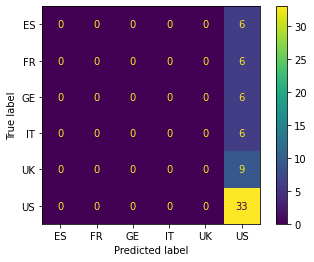

In [68]:
metrics.plot_confusion_matrix(classifier, X_test, y_test)

Expérimentation avec standardisation

In [121]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', degree=10, gamma='auto', tol=0.00001, cache_size=1000)
classifier.fit(X_train_scaled, y_train)
y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print('Train accuracy:', '{:.2f}'.format(accuracy_train), '\nTest accuracy:', '{:.2f}'.format(accuracy_test))

Train accuracy: 0.86 
Test accuracy: 0.79


C:\Users\isen\anaconda3\envs\meab\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


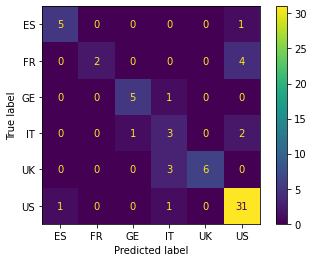

In [69]:
metrics.plot_confusion_matrix(classifier, X_test_scaled, y_test)

Expérimentation sans GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C':list(range(1,10))}

classifier = SVC()

clf = GridSearchCV(classifier, parameters)

In [118]:
clf.fit(X_train_scaled, y_train)
print('Best : ', clf.best_params_)
print('Acc Train : ', clf.score(X_train_scaled, y_train))
print('Acc Test : ', clf.score(X_test_scaled, y_test))

Best :  {'C': 5, 'kernel': 'rbf'}
Acc Train :  0.9467680608365019
Acc Test :  0.8333333333333334


In [119]:
clf.fit(X_train, y_train)
print('Best : ', clf.best_params_)
print('Acc Train : ', clf.score(X_train, y_train))
print('Acc Test : ', clf.score(X_test, y_test))

Best :  {'C': 9, 'kernel': 'rbf'}
Acc Train :  0.9125475285171103
Acc Test :  0.7575757575757576


## Etude de cas
Un client cherche un produit pour identifier que l’accent italien et l’accent français.
Quel est votre proposition pour ce client ?

J'ai programmé une fonction pour vous faciliter la classification d'un nouveau Voice, la fonction est "rec_accent".
Les inputs de la fonction sont :
- classifier : le modèle SVM ou autre.
- Record=True : pour faire votre propre enregistrement.
- Record=False : pour charger un enregistrement existant.

Output est votre reconnaissance.

In [21]:
df = pd.read_csv('accent-mfcc-data-1.csv')

In [22]:
df['language'].unique()

array(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype=object)

Solution 1 : Remplacer la classe ES, GE, UK et US par une classe commune comme « Autre ».

Solution 2 : travailler que sur la Classe « FR » et « IT »

In [134]:
# Solution 1
df['language'] = df['language'].replace('ES', 'Autre')
df['language'] = df['language'].replace('GE', 'Autre')
df['language'] = df['language'].replace('UK', 'Autre')
df['language'] = df['language'].replace('US', 'Autre')
pd.unique(df['language'])

array(['FR', 'IT'], dtype=object)

In [23]:
# Solution 2
sub1 = df[df['language']=='FR']
sub2 = df[df['language']=='IT']
df = pd.concat([sub1, sub2], ignore_index=True)
pd.unique(df['language'])

array(['FR', 'IT'], dtype=object)

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [29]:
y = df['language']
X = df.select_dtypes('number')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

scaler = StandardScaler() 
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train) 
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) 

X_test_scaled = scaler.transform(X_test) 
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) 

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C':list(range(1,10))}

classifier = SVC()

clf = GridSearchCV(classifier, parameters)

Train: (45, 12) Test: (15, 12)


In [35]:
clf.fit(X_train_scaled, y_train)
print('Best : ', clf.best_params_)
print('Acc Train : ', clf.score(X_train_scaled, y_train))
print('Acc Test : ', clf.score(X_test_scaled, y_test))

Best :  {'C': 1, 'kernel': 'rbf'}
Acc Train :  1.0
Acc Test :  0.8666666666666667


In [31]:
clf.fit(X_train, y_train)
print('Best : ', clf.best_params_)
print('Acc Train : ', clf.score(X_train, y_train))
print('Acc Test : ', clf.score(X_test, y_test))

Best :  {'C': 4, 'kernel': 'rbf'}
Acc Train :  1.0
Acc Test :  0.8666666666666667


In [38]:
import sounddevice as sd #sinon pip install sounddevice
import time #sinon pip install python-time
import scipy.io.wavfile as wav
from python_speech_features import mfcc #sinon pip install python_speech_features==0.4
import tkinter as tk #sinon pip install tk
from tkinter import filedialog

def rec_accent(scaler, classifier, Record=True):
    if Record == True :
        #Enregistrement
        print("Attention, l'enregistrement commence dans :")
        (rate,sig) = wav.read("beep-04.wav")
        sd.play(sig, rate)
        for i in range(0,6):
            time.sleep(1)
            print(5-i)
        time.sleep(1)
        freq = 44100
        duration = 1
        recording = sd.rec(int(duration * freq), samplerate=freq, channels=2)
        print("Parler maintenant ...!!")
        sd.wait()  
        print("Fin...")
    else :
        root = tk.Tk()
        root.withdraw()
        file_path = filedialog.askopenfilename()
        (rate,recording) = wav.read(file_path)
            
    # Caractérisation
    mfcc_feat = mfcc(recording,rate, numcep=12)
    mfcc_feat = np.expand_dims(np.mean(mfcc_feat, axis=0), axis=0)
    mfcc_feat = scaler.transform(mfcc_feat)
    pred = classifier.predict(mfcc_feat)
    print('------------------')
    print('Accent : ', pred[0])
    print('------------------')

In [39]:
rec_accent(scaler, clf, Record=True)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Parler maintenant ...!!
Fin...
------------------
Accent :  FR
------------------


C:\Users\isen\anaconda3\envs\meab\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\isen\anaconda3\envs\meab\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
